
# PROJET MACHINE LEARNING : AMADOU DJIGO  ET DAOUDA DIOP
# Prédiction du taux de chômage aux États-Unis
# Dataset : Unemployment in America per US State (Kaggle)


# 1. Importation des librairies

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Chargement du dataset

In [4]:

data = pd.read_csv("Unemployment in America Per US State.csv")



# 3️⃣ Aperçu des données

In [5]:

print("Aperçu du jeu de données :")
print(data.head())

print("\nInformations générales :")
print(data.info())

Aperçu du jeu de données :
   FIPS Code  State/Area  Year  Month  \
0          1     Alabama  1976      1   
1          2      Alaska  1976      1   
2          4     Arizona  1976      1   
3          5    Arkansas  1976      1   
4          6  California  1976      1   

  Total Civilian Non-Institutional Population in State/Area  \
0                                       2,605,000             
1                                         232,000             
2                                       1,621,000             
3                                       1,536,000             
4                                      15,621,000             

  Total Civilian Labor Force in State/Area  \
0                             1,484,555      
1                               160,183      
2                               964,120      
3                               889,044      
4                             9,774,280      

   Percent (%) of State/Area's Population Total Employment in State/Ar

In [6]:
data.head()

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2


# 4️⃣ Nettoyage des données

In [7]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes :")
print(data.isnull().sum())


Valeurs manquantes :
FIPS Code                                                    0
State/Area                                                   0
Year                                                         0
Month                                                        0
Total Civilian Non-Institutional Population in State/Area    0
Total Civilian Labor Force in State/Area                     0
Percent (%) of State/Area's Population                       0
Total Employment in State/Area                               0
Percent (%) of Labor Force Employed in State/Area            0
Total Unemployment in State/Area                             0
Percent (%) of Labor Force Unemployed in State/Area          0
dtype: int64


In [8]:
# Suppression ou imputation des valeurs manquantes
data = data.dropna()

#### VISUALISATION DES TENDANCES DU TAUX DE CHÔMAGE

In [9]:
plt.style.use('seaborn-v0_8-darkgrid')

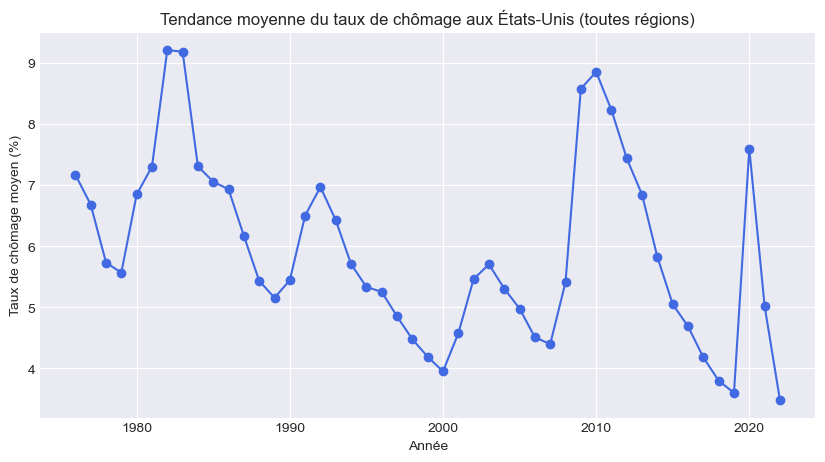

In [10]:
# 1️⃣ Tendance globale du chômage au fil des années (moyenne nationale)
yearly_trend = data.groupby("Year")["Percent (%) of Labor Force Unemployed in State/Area"].mean()

plt.figure(figsize=(10,5))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', color='royalblue')
plt.title("Tendance moyenne du taux de chômage aux États-Unis (toutes régions)")
plt.xlabel("Année")
plt.ylabel("Taux de chômage moyen (%)")
plt.grid(True)
plt.show()

Graphique 1 : montre la tendance nationale du chômage au fil des années.

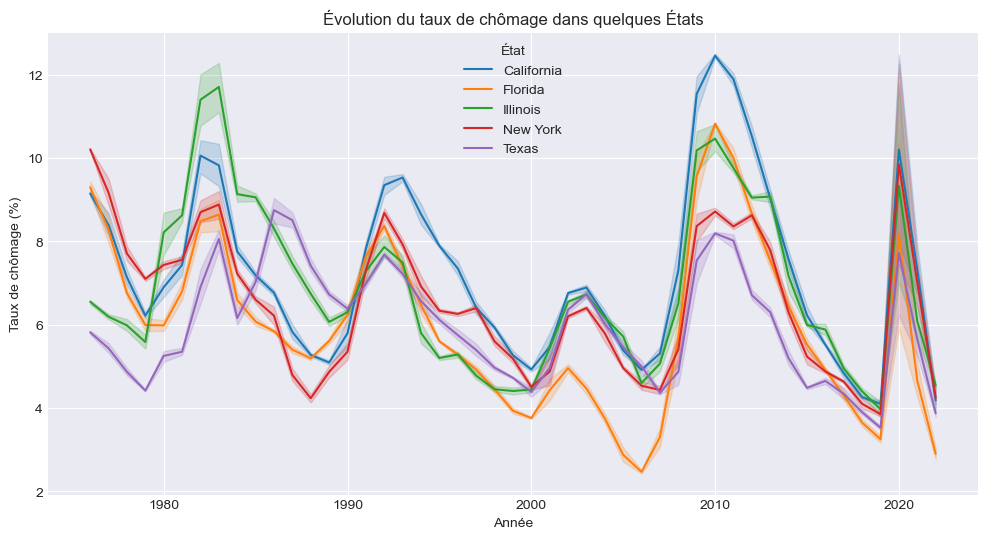

In [11]:
# 2️⃣ Évolution du chômage pour quelques États représentatifs
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
state_trends = data[data["State/Area"].isin(selected_states)]

plt.figure(figsize=(12,6))
sns.lineplot(data=state_trends, x="Year", y="Percent (%) of Labor Force Unemployed in State/Area", hue="State/Area")
plt.title("Évolution du taux de chômage dans quelques États")
plt.xlabel("Année")
plt.ylabel("Taux de chômage (%)")
plt.legend(title="État")
plt.show()

Graphique 2 : compare 5 grands États pour voir les différences régionales.

C:\Users\dadiop\AppData\Local\Temp\ipykernel_15656\4215806187.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_mean.values, y=region_mean.index, palette="viridis")


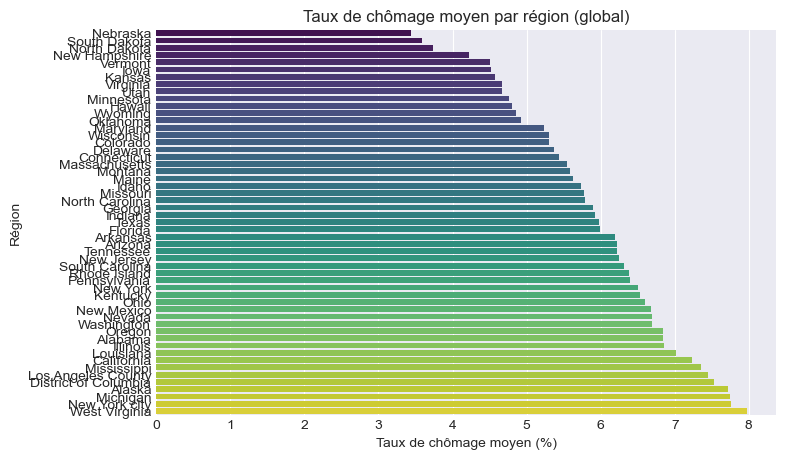

In [12]:
# 3️⃣ Taux de chômage moyen par région sur toute la période
region_mean = data.groupby("State/Area")["Percent (%) of Labor Force Unemployed in State/Area"].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=region_mean.values, y=region_mean.index, palette="viridis")
plt.title("Taux de chômage moyen par région (global)")
plt.xlabel("Taux de chômage moyen (%)")
plt.ylabel("Région")
plt.show()

Graphique 3 : affiche la moyenne par région (Sud, Ouest, etc.).

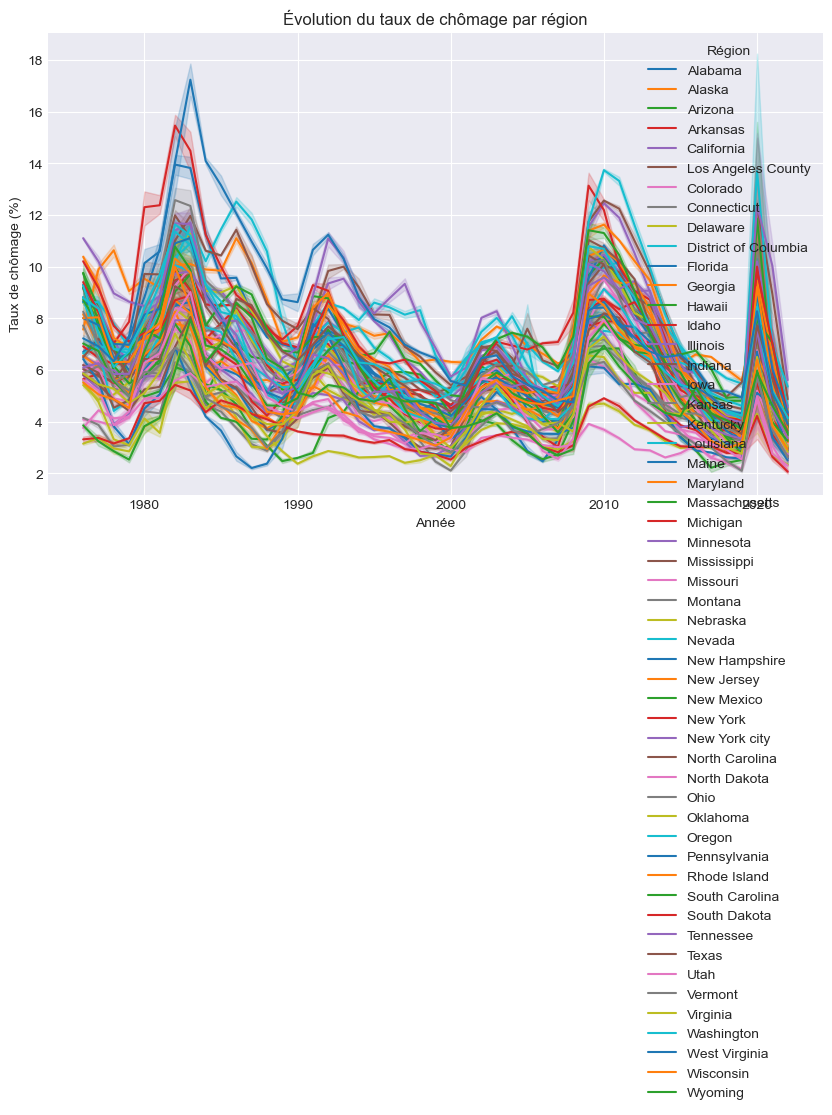

In [13]:
# 4️⃣ Tendance du chômage par région au fil du temps
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x="Year", y="Percent (%) of Labor Force Unemployed in State/Area", hue="State/Area", palette="tab10")
plt.title("Évolution du taux de chômage par région")
plt.xlabel("Année")
plt.ylabel("Taux de chômage (%)")
plt.legend(title="Région")
plt.show()

Graphique 4 : met en évidence l’évolution du chômage par région dans le temps.

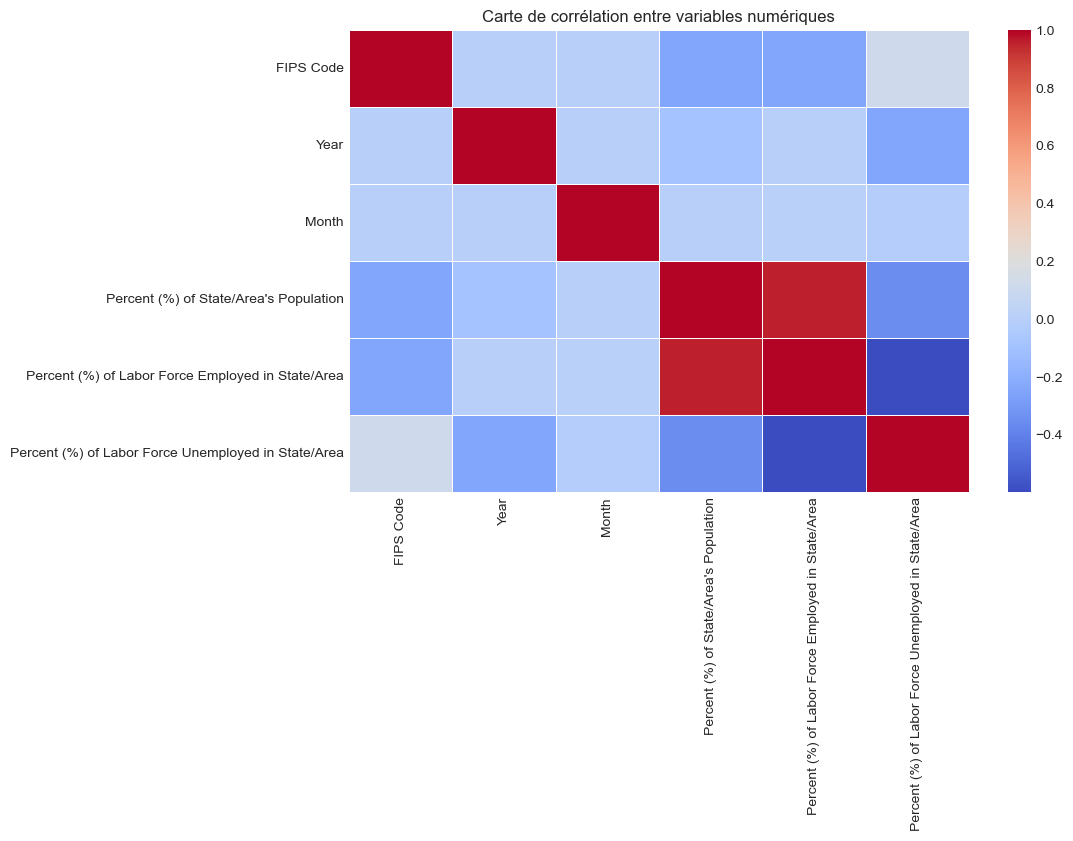

In [14]:
# 5️⃣ Carte de corrélation entre les variables numériques
plt.figure(figsize=(10,6))
corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Carte de corrélation entre variables numériques")
plt.show()

Graphique 5 : la heatmap permet de repérer les variables les plus corrélées (utile pour le choix des features).

# 5️⃣ Sélection des variables pertinentes

In [15]:
# On va prédire "Percent (%) of Labor Force Unemployed in State/Area"
target = "Percent (%) of Labor Force Unemployed in State/Area"
# Variables explicatives : on enlève les colonnes non numériques ou identifiants
features = data.drop(columns=[target, "State/Area"])

# 6️⃣ Séparation en variables X et y

In [16]:
X = features.select_dtypes(include=[np.number])
y = data[target]

# 7️⃣ Division en jeu d'entraînement et de test


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8️⃣ Normalisation (utile pour la régression linéaire)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9️⃣ Entraînement de deux modèles : Régression Linéaire et Forêt Aléatoire

In [19]:
# --- Modèle 1 : Régression Linéaire
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [20]:
# --- Modèle 2 : Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 🔟 Évaluation des modèles

In [21]:
def eval_model(name, y_true, y_pred):
    print(f"\n🔹 {name}")
    print(f"R² Score : {r2_score(y_true, y_pred):.4f}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
eval_model("Régression Linéaire", y_test, y_pred_lr)
eval_model("Random Forest", y_test, y_pred_rf)


🔹 Régression Linéaire
R² Score : 0.9937
RMSE : 0.1770

🔹 Random Forest
R² Score : 0.9968
RMSE : 0.1257


les modèle expliquent au moins 99 % de la variabilité du taux de chômage — ce sont tous excellent.

Plus le RMSE est petit, mieux c’est.

Le RMSE du model Random Forest = 0.1257, alors modèle se trompe en moyenne de 0.1257 points de pourcentage sur le taux de chômage.

# 11 Visualisation des résultats

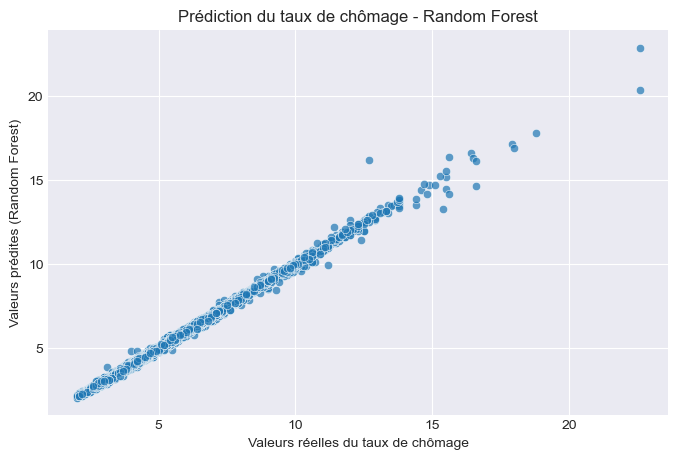

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.xlabel("Valeurs réelles du taux de chômage")
plt.ylabel("Valeurs prédites (Random Forest)")
plt.title("Prédiction du taux de chômage - Random Forest")
plt.show()

# 12️ Importance des variables (Random Forest)

C:\Users\dadiop\AppData\Local\Temp\ipykernel_15656\580631848.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df, x="Importance", y="Variable", palette="viridis")


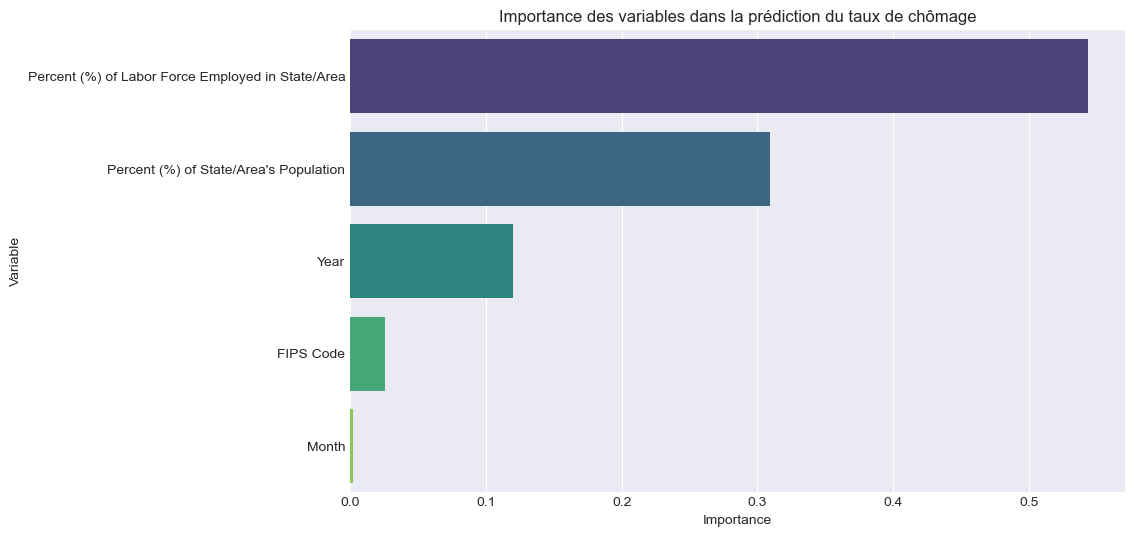


✅ Modèle entraîné avec succès !


In [23]:

importances = rf_model.feature_importances_
feature_names = X.columns

imp_df = pd.DataFrame({'Variable': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=imp_df, x="Importance", y="Variable", palette="viridis")
plt.title("Importance des variables dans la prédiction du taux de chômage")
plt.show()

print("\n✅ Modèle entraîné avec succès !")

### Ajouter un graphique des résidus

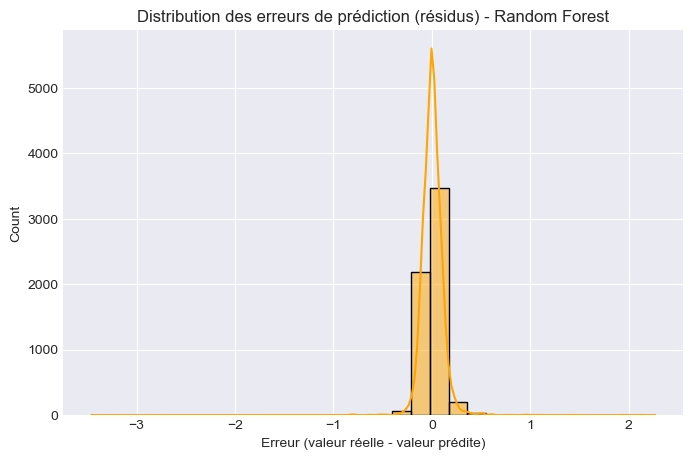

In [24]:
# Graphique des résidus (erreurs de prédiction du modèle Random Forest)
residuals = y_test - y_pred_rf
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color="orange")
plt.title("Distribution des erreurs de prédiction (résidus) - Random Forest")
plt.xlabel("Erreur (valeur réelle - valeur prédite)")
plt.show()

##### Calcul de métriques supplémentaires

In [25]:

from sklearn.metrics import mean_absolute_error

print("\nMétriques supplémentaires pour Random Forest :")
print(f"MAE (erreur absolue moyenne) : {mean_absolute_error(y_test, y_pred_rf):.4f}")


Métriques supplémentaires pour Random Forest :
MAE (erreur absolue moyenne) : 0.0749


### Sauvegarde du modèle pour réutilisation

In [26]:
import joblib
# Sauvegarde du modèle Random Forest
joblib.dump(rf_model, "random_forest_model.pkl")
print("\n💾 Modèle Random Forest sauvegardé dans random_forest_model.pkl")


💾 Modèle Random Forest sauvegardé dans random_forest_model.pkl


### Comparaison visuelle entre les deux modèles

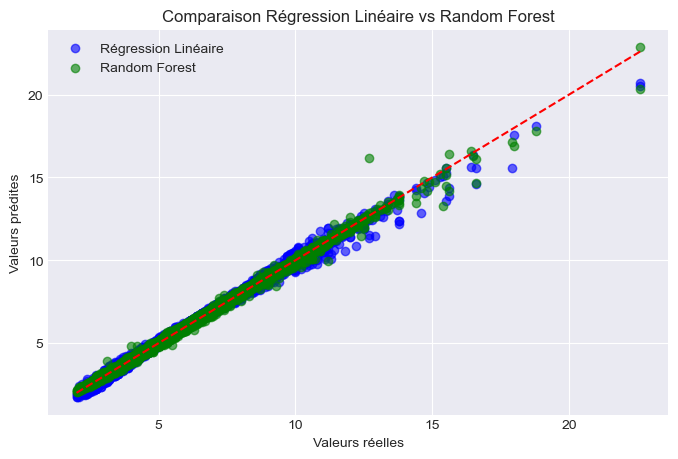

In [27]:

# Comparaison des performances entre les deux modèles
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, color='blue', label='Régression Linéaire', alpha=0.6)
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison Régression Linéaire vs Random Forest")
plt.legend()
plt.show()

#### Afficher les 10 prédictions les plus éloignées

In [28]:
# Analyse des plus grandes erreurs
errors = pd.DataFrame({
    "Valeur réelle": y_test,
    "Valeur prédite": y_pred_rf,
    "Erreur absolue": abs(y_test - y_pred_rf)
})
print("\n🔎 Les 10 plus grandes erreurs de prédiction :")
print(errors.sort_values(by="Erreur absolue", ascending=False).head(10))


🔎 Les 10 plus grandes erreurs de prédiction :
       Valeur réelle  Valeur prédite  Erreur absolue
28177           12.7          16.157           3.457
28155           22.6          20.332           2.268
28237           15.4          13.274           2.126
4343            16.6          14.665           1.935
28176           15.6          14.184           1.416
28152           11.2           9.933           1.267
28157           18.0          16.895           1.105
28218           15.5          14.459           1.041
28278           18.8          17.821           0.979
28160           12.4          11.450           0.950


# prediction pour 2030